In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pyplot
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/william/William.xlsx
/kaggle/input/nasket2/nasket2.xlsx
/kaggle/input/nasketfixed/fixed.xlsx


### Read data

In [2]:
df = pd.read_excel('/kaggle/input/nasketfixed/fixed.xlsx')
df.head(10)

,id,sentence,Overall Sentiment\n(Positive/Negative/Neutral),"Services & Staff\n(0 = not mentioned, \n1 = mentioned)",Services & Staff Sentiment,"Amenities Sentiment(0 = not mentioned, \n1 = mentioned)",Amenities Sentiment,"Hotel Condition \n(0 = not mentioned, \n1 = mentioned)",Hotel Condition Sentiment,"Cleanliness\n(0 = not mentioned, \n1 = mentioned)",Cleanliness Sentiment
0,34437648,5 Stories with no elevator,Negative,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
1,34437648,Great location right at Nana BTS Station!,Positive,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
2,34437648,Room was modern and clean eventhough small.,Positive,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
3,34437648,Only gripe... stairs only and my room was on t...,Negative,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
4,34437886,Dump,Negative,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
5,34437886,pretty run down old hotel.,Negative,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
6,34437886,its nothing like what the photos depict.,Negative,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
7,34437886,book elsewhere.,Negative,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
8,36080259,"Amazing service, amazing staff, amazing room",Positive,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN
9,36080259,This is hotel is conveniently located next to ...,Positive,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN


In [3]:
df2 = pd.read_excel('/kaggle/input/william/William.xlsx')
df2.head(10)

,id,sentence,Overall Sentiment\n(Positive/Negative/Neutral),"Services & Staff\n(0 = not mentioned, \n1 = mentioned)",Services & Staff Sentiment,"Amenities \n(0 = not mentioned, \n1 = mentioned)",Amenities Sentiment,"Hotel Condition \n(0 = not mentioned, \n1 = mentioned)",Hotel Condition Sentiment,"Cleanliness\n(0 = not mentioned, \n1 = mentioned)",Cleanliness Sentiment
0,34437648,5 Stories with no elevator,Neutral,0,NaN,0.0,NaN,0,NaN,0.0,NaN
1,34437648,Great location right at Nana BTS Station!,Neutral,0,NaN,0.0,NaN,0,NaN,0.0,NaN
2,34437648,Room was modern and clean eventhough small.,Neutral,0,NaN,0.0,NaN,0,NaN,1.0,Positive
3,34437648,Only gripe... stairs only and my room was on t...,Negative,0,NaN,0.0,NaN,0,NaN,0.0,NaN
4,34437886,Dump,Negative,0,NaN,0.0,NaN,0,NaN,0.0,NaN
5,34437886,pretty run down old hotel.,Negative,0,NaN,0.0,NaN,1,Negative,0.0,NaN
6,34437886,its nothing like what the photos depict.,Negative,0,NaN,0.0,NaN,0,NaN,0.0,NaN
7,34437886,book elsewhere.,Negative,0,NaN,0.0,NaN,0,NaN,0.0,NaN
8,36080259,"Amazing service, amazing staff, amazing room",Positive,1,Positive,0.0,NaN,0,NaN,0.0,NaN
9,36080259,This is hotel is conveniently located next to ...,Positive,0,NaN,0.0,NaN,0,NaN,0.0,NaN


### Filter data

In [4]:
reviews_df = df[['sentence','Overall Sentiment\n(Positive/Negative/Neutral)']]
reviews_df.head(10)

,sentence,Overall Sentiment\n(Positive/Negative/Neutral)
0,5 Stories with no elevator,Negative
1,Great location right at Nana BTS Station!,Positive
2,Room was modern and clean eventhough small.,Positive
3,Only gripe... stairs only and my room was on t...,Negative
4,Dump,Negative
5,pretty run down old hotel.,Negative
6,its nothing like what the photos depict.,Negative
7,book elsewhere.,Negative
8,"Amazing service, amazing staff, amazing room",Positive
9,This is hotel is conveniently located next to ...,Positive


In [5]:
aspect_df = df2[['Overall Sentiment\n(Positive/Negative/Neutral)', 'Services & Staff\n(0 = not mentioned, \n1 = mentioned)', 'Services & Staff Sentiment', 'Amenities \n(0 = not mentioned, \n1 =  mentioned)', 'Amenities Sentiment', 'Hotel Condition \n(0 = not mentioned, \n1 =  mentioned)', 'Hotel Condition Sentiment', 'Cleanliness\n(0 = not mentioned, \n1 =  mentioned)', 'Cleanliness Sentiment']]
aspect_df.head(5)

,Overall Sentiment\n(Positive/Negative/Neutral),"Services & Staff\n(0 = not mentioned, \n1 = mentioned)",Services & Staff Sentiment,"Amenities \n(0 = not mentioned, \n1 = mentioned)",Amenities Sentiment,"Hotel Condition \n(0 = not mentioned, \n1 = mentioned)",Hotel Condition Sentiment,"Cleanliness\n(0 = not mentioned, \n1 = mentioned)",Cleanliness Sentiment
0,Neutral,0,NaN,0.0,NaN,0,NaN,0.0,NaN
1,Neutral,0,NaN,0.0,NaN,0,NaN,0.0,NaN
2,Neutral,0,NaN,0.0,NaN,0,NaN,1.0,Positive
3,Negative,0,NaN,0.0,NaN,0,NaN,0.0,NaN
4,Negative,0,NaN,0.0,NaN,0,NaN,0.0,NaN


### Inconsistent Labeling

In [6]:
reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].unique() 

array(['Negative', 'Positive', 'Neutral', 'Negative ', 'Positive ',
       'Neutral '], dtype=object)

### Fix

In [7]:
reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].replace('Positive ', 'Positive', inplace=True)
reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].replace('Neutral ', 'Neutral', inplace=True)
reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].replace('Negative ', 'Negative', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].unique() 

array(['Negative', 'Positive', 'Neutral'], dtype=object)

## Overall Sentiment Distribution 

In [9]:
reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].value_counts()

Positive    3302
Negative    1795
Neutral     1208
Name: Overall Sentiment\n(Positive/Negative/Neutral), dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

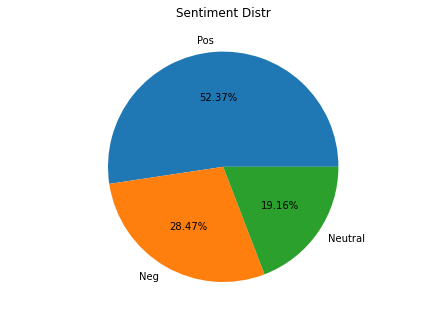

In [10]:
from matplotlib import pylab
from pylab import *
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['Pos', 'Neg', 'Neutral']
ax.pie(reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'].value_counts(), labels = label,autopct='%1.2f%%')
plt.title('Sentiment Distr')
plt.show

## Aspect Distribution

In [11]:
aspect_dist = aspect_df.apply(pd.Series.value_counts)
aspect_dist

,Overall Sentiment\n(Positive/Negative/Neutral),"Services & Staff\n(0 = not mentioned, \n1 = mentioned)",Services & Staff Sentiment,"Amenities \n(0 = not mentioned, \n1 = mentioned)",Amenities Sentiment,"Hotel Condition \n(0 = not mentioned, \n1 = mentioned)",Hotel Condition Sentiment,"Cleanliness\n(0 = not mentioned, \n1 = mentioned)",Cleanliness Sentiment
0,NaN,5335.0,NaN,5355.0,NaN,5971.0,NaN,5859.0,NaN
1,NaN,970.0,NaN,949.0,NaN,334.0,NaN,445.0,NaN
Negative,1540.0,NaN,210.0,NaN,359.0,NaN,203.0,NaN,134.0
Neutral,1540.0,NaN,46.0,NaN,134.0,NaN,34.0,NaN,6.0
Positive,3225.0,NaN,712.0,NaN,456.0,NaN,97.0,NaN,305.0


In [12]:
columns = ['Services & Staff\n(0 = not mentioned, \n1 = mentioned)',
 'Amenities \n(0 = not mentioned, \n1 =  mentioned)',
 'Hotel Condition \n(0 = not mentioned, \n1 =  mentioned)',
 'Cleanliness\n(0 = not mentioned, \n1 =  mentioned)']

mentioned_list = []
for name in columns:
    mentioned_list.append(aspect_df.apply(pd.Series.value_counts)[name].tolist()[1])

print("Service & Staff: ",mentioned_list[0],"\nAmenities: ",mentioned_list[1],"\nHotel Condition: ",
      mentioned_list[2],"\nCleanliness: ",mentioned_list[3])

Service & Staff:  970.0 
Amenities:  949.0 
Hotel Condition:  334.0 
Cleanliness:  445.0


Text(0.5, 1.0, 'Aspect Distribution')

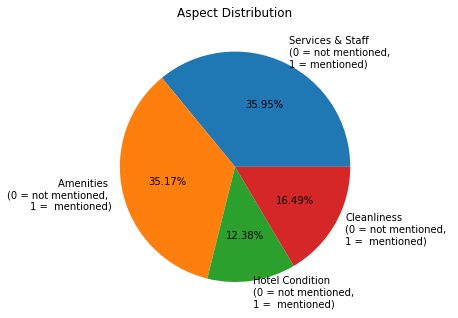

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = columns
ax.pie(mentioned_list, labels = label,autopct='%1.2f%%')
plt.title('Aspect Distribution')


<function matplotlib.pyplot.show(*args, **kw)>

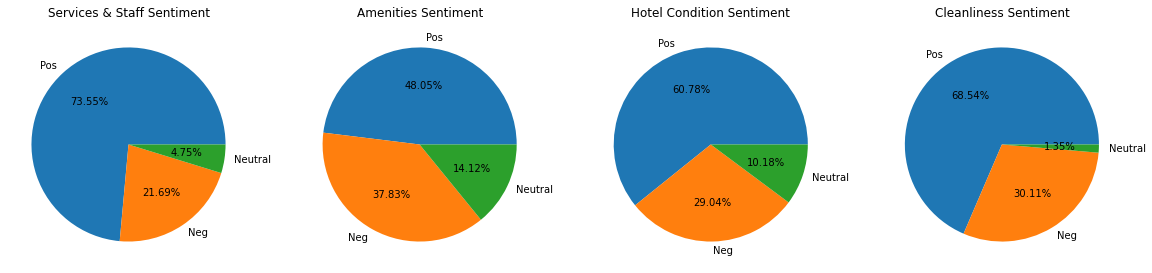

In [14]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,30))
label = ['Pos', 'Neg', 'Neutral']
ax1.pie(aspect_df['Services & Staff Sentiment'].value_counts(), labels = label,autopct='%1.2f%%')
ax1.set_title('Services & Staff Sentiment')


ax2.pie(aspect_df['Amenities Sentiment'].value_counts(), labels = label,autopct='%1.2f%%')
ax2.set_title('Amenities Sentiment')


ax3.pie(aspect_df['Hotel Condition Sentiment'].value_counts(), labels = label,autopct='%1.2f%%')
ax3.set_title('Hotel Condition Sentiment')


ax4.pie(aspect_df['Cleanliness Sentiment'].value_counts(), labels = label,autopct='%1.2f%%')
ax4.set_title('Cleanliness Sentiment')

plt.show

## Pre-processing

In [15]:
import re
reviews_df['sentence'] = reviews_df['sentence'].str.replace('[^\w\s]','')
reviews_df['sentence'] = reviews_df['sentence'].str.replace('\d+', '')
reviews_df['sentence'] = reviews_df['sentence'].str.lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

### Drop empty cells

In [16]:
drop = reviews_df[pd.isnull(reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)'])].index
reviews_df.drop(drop , inplace=True)
reviews_df = reviews_df.reset_index(drop = True) 
reviews_df.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sentence,Overall Sentiment\n(Positive/Negative/Neutral)
0,stories with no elevator,Negative
1,great location right at nana bts station,Positive
2,room was modern and clean eventhough small,Positive
3,only gripe stairs only and my room was on the ...,Negative
4,dump,Negative
5,pretty run down old hotel,Negative
6,its nothing like what the photos depict,Negative
7,book elsewhere,Negative
8,amazing service amazing staff amazing room,Positive
9,this is hotel is conveniently located next to ...,Positive


In [17]:
reviews_df['sentence'].replace('', np.nan, inplace=True)
drop = reviews_df[pd.isnull(reviews_df['sentence'])].index
reviews_df.drop(drop , inplace=True)
reviews_df = reviews_df.reset_index(drop = True) 
reviews_df.head(10)

,sentence,Overall Sentiment\n(Positive/Negative/Neutral)
0,stories with no elevator,Negative
1,great location right at nana bts station,Positive
2,room was modern and clean eventhough small,Positive
3,only gripe stairs only and my room was on the ...,Negative
4,dump,Negative
5,pretty run down old hotel,Negative
6,its nothing like what the photos depict,Negative
7,book elsewhere,Negative
8,amazing service amazing staff amazing room,Positive
9,this is hotel is conveniently located next to ...,Positive


### Remove stop words

In [18]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [19]:
reviews_df['no_sw'] = reviews_df['sentence'][:].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [20]:
reviews_df

,sentence,Overall Sentiment\n(Positive/Negative/Neutral),no_sw
0,stories with no elevator,Negative,stories elevator
1,great location right at nana bts station,Positive,great location right nana bts station
2,room was modern and clean eventhough small,Positive,room modern clean eventhough small
3,only gripe stairs only and my room was on the ...,Negative,gripe stairs room top floor th floor really ho...
4,dump,Negative,dump
...,...,...,...
6240,good experience,Positive,good experience
6241,hotel is basic but is clean and has all the am...,Neutral,hotel basic clean amenities needed
6242,lots of shops and restaurants nearby,Neutral,lots shops restaurants nearby
6243,i had a reservation issue which was my fault a...,Neutral,reservation issue fault worked resolve issue e...


## Bag of words

In [21]:
import nltk
from nltk import pos_tag, word_tokenize

In [22]:
# reviews_df['cleaned'] = [' '.join([Speller(i) for i in x.split()]) for x in reviews_df['no_sw']]

In [23]:
wordfreq = {}
for sentence in reviews_df['no_sw']:
    tokens = word_tokenize(sentence)
    sent_vec = []
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

### Select number of most frequent words to use as features

In [24]:
import heapq
num_features = 2500
most_freq = heapq.nlargest(num_features, wordfreq, key=wordfreq.get)

### Vectorize

In [25]:
sentence_vectors = []
for sentence in reviews_df['no_sw']:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [26]:
sentence_vectors = np.asarray(sentence_vectors)
sentence_vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

## Building Model

### Train/test split

In [27]:
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer

labels = []
for i in reviews_df['Overall Sentiment\n(Positive/Negative/Neutral)']:
    if i == "Positive":
        labels.append(0)
    elif i == "Neutral":
        labels.append(1)
    else:
        labels.append(2)

# labels = np.array(list(map(lambda x: 1 if x=="Positive" else 0, labels)))
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, labels, stratify=labels, test_size=0.2, random_state=42)

### Sample with RFC

In [28]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [29]:
predictions = text_classifier.predict(X_test)

### Evaluations

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[523  69  68]
 [ 80  87  63]
 [ 85  82 192]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       660
           1       0.37      0.38      0.37       230
           2       0.59      0.53      0.56       359

    accuracy                           0.64      1249
   macro avg       0.57      0.57      0.57      1249
weighted avg       0.64      0.64      0.64      1249

0.6421136909527622


## Deep Learning

In [31]:
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [32]:
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [33]:
input_dim = X_train.shape[1] # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                25010     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 25,043
Trainable params: 25,043
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=5)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8860 - accuracy: 0.6077 - val_loss: 0.8006 - val_accuracy: 0.6765
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6854 - accuracy: 0.7246 - val_loss: 0.7839 - val_accuracy: 0.6918
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5764 - accuracy: 0.7810 - val_loss: 0.8027 - val_accuracy: 0.6861
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4971 - accuracy: 0.8183 - val_loss: 0.8339 - val_accuracy: 0.6926
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4365 - accuracy: 0.8445 - val_loss: 0.8773 - val_accuracy: 0.6789
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3873 - accuracy: 0.8641 - val_loss: 0.9259 - val_accuracy: 0.6733
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3487 - accuracy: 0.8753 - val_loss: 0.9793 - val_accuracy:

In [36]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9271
Testing Accuracy:  0.6613


In [37]:
y_pred = model.predict(X_test, batch_size=5, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_labels = np.argmax(y_test, axis=1)

print(classification_report(y_labels, y_pred_bool))

250/250 [==============================] - 0s 979us/step
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       660
           1       0.42      0.36      0.38       230
           2       0.62      0.58      0.60       359

    accuracy                           0.66      1249
   macro avg       0.59      0.58      0.59      1249
weighted avg       0.65      0.66      0.65      1249

